<a href="https://colab.research.google.com/github/shaoni11/Coursera_Capstone/blob/master/jobAthon_sept21_catboost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [32]:
import numpy as np
import pandas as pd
import pandas_profiling
from pandas_profiling import ProfileReport
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
sns.set_style("whitegrid")
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [74]:
from statsmodels.tsa.stattools import adfuller
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.pipeline import Pipeline
from keras.models import model_from_json
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
#from sklearn.externals import joblib
from keras.models import load_model

In [33]:
train_df = pd.read_csv('/content/drive/MyDrive/data/TRAIN.csv')
test_df = pd.read_csv('/content/drive/MyDrive/data/TEST_FINAL.csv')
train_df.head(5)

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52


In [34]:
test_df.head(5)

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount
0,T1188341,171,S4,L2,R3,2019-06-01,0,No
1,T1188342,172,S1,L1,R1,2019-06-01,0,No
2,T1188343,173,S4,L2,R1,2019-06-01,0,No
3,T1188344,174,S1,L1,R4,2019-06-01,0,No
4,T1188345,170,S1,L1,R2,2019-06-01,0,No


In [35]:
train_df.describe(include='all')

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
count,188340,188340.000000,188340,188340,188340,188340,188340.000000,188340,188340.000000,188340.000000
unique,188340,NaN,4,5,4,516,NaN,2,NaN,NaN
top,T1115766,NaN,S1,L1,R1,2018-12-25,NaN,No,NaN,NaN
freq,1,NaN,88752,85140,63984,365,NaN,104051,NaN,NaN
mean,NaN,183.000000,NaN,NaN,NaN,NaN,0.131783,NaN,68.205692,42784.327982
std,NaN,105.366308,NaN,NaN,NaN,NaN,0.338256,NaN,30.467415,18456.708302
min,NaN,1.000000,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000
25%,NaN,92.000000,NaN,NaN,NaN,NaN,0.000000,NaN,48.000000,30426.000000
50%,NaN,183.000000,NaN,NaN,NaN,NaN,0.000000,NaN,63.000000,39678.000000
75%,NaN,274.000000,NaN,NaN,NaN,NaN,0.000000,NaN,82.000000,51909.000000


In [36]:
#!pip install pandas_profiling --upgrade

In [37]:
profile = ProfileReport(train_df)
profile

Summarize dataset:   0%|          | 0/23 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [38]:
profile.to_file("Sales_Analysis.html")
profile.to_file("Sales_Analysis.json")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Render JSON:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

We have a clear idea about the dataset now. We have done the basic analysis on the dataset. We found the dataset is clean with no missing values & no duplicate values. We also got an insight that the data belongs to imbalance class as class '0' in holiday category has 163520 values whereas class'1' has 24820 values. We also got insight on correlated variables. 


In [39]:
test_profile = ProfileReport(test_df)
test_profile

Summarize dataset:   0%|          | 0/21 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [40]:
test_profile.to_file("test_Sales_Analysis.html")
test_profile.to_file("test_Sales_Analysis.json")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Render JSON:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [41]:
#!pip install klib
import klib

Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


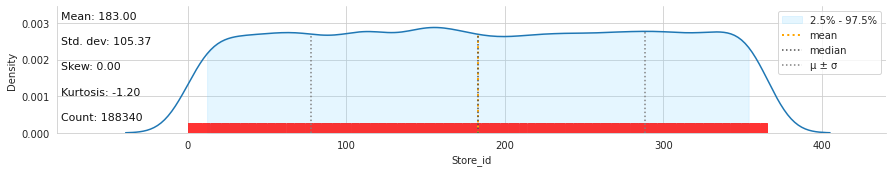

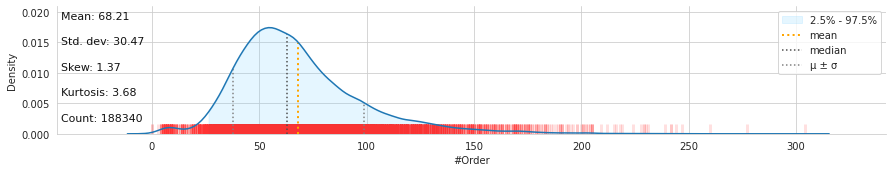

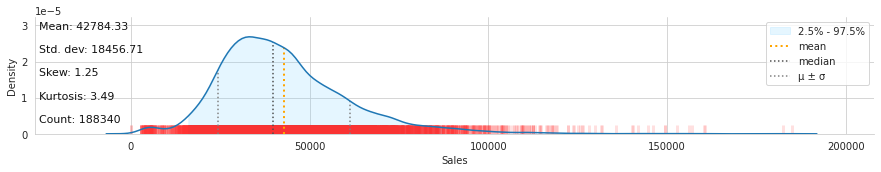

In [42]:
klib.dist_plot(train_df)

In [43]:
klib.data_cleaning(train_df)

Shape of cleaned data: (188340, 10)Remaining NAs: 0

Changes:
Dropped rows: 0
     of which 0 duplicates. (Rows: [])
Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 0
Reduced memory by at least: 10.21 MB (-71.05%)



,id,store_id,store_type,location_type,region_code,date,holiday,discount,hash_order,sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.839844
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.121094
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.199219
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.160156
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.519531
...,...,...,...,...,...,...,...,...,...,...
188335,T1188336,149,S2,L3,R2,2019-05-31,1,Yes,51,37272.000000
188336,T1188337,153,S4,L2,R1,2019-05-31,1,No,90,54572.640625
188337,T1188338,154,S1,L3,R2,2019-05-31,1,No,56,31624.560547
188338,T1188339,155,S3,L1,R2,2019-05-31,1,Yes,70,49162.410156


In [44]:
klib.clean_column_names(train_df)

,id,store_id,store_type,location_type,region_code,date,holiday,discount,hash_order,sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52
...,...,...,...,...,...,...,...,...,...,...
188335,T1188336,149,S2,L3,R2,2019-05-31,1,Yes,51,37272.00
188336,T1188337,153,S4,L2,R1,2019-05-31,1,No,90,54572.64
188337,T1188338,154,S1,L3,R2,2019-05-31,1,No,56,31624.56
188338,T1188339,155,S3,L1,R2,2019-05-31,1,Yes,70,49162.41


In [45]:
train_df=klib.convert_datatypes(train_df)

Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


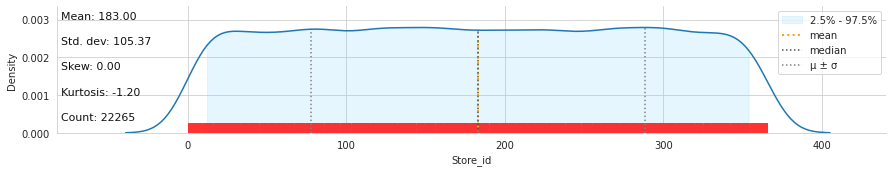

In [46]:
klib.dist_plot(test_df)


In [47]:
klib.data_cleaning(test_df)

Shape of cleaned data: (22265, 8)Remaining NAs: 0

Changes:
Dropped rows: 0
     of which 0 duplicates. (Rows: [])
Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 0
Reduced memory by at least: 1.02 MB (-75.0%)



,id,store_id,store_type,location_type,region_code,date,holiday,discount
0,T1188341,171,S4,L2,R3,2019-06-01,0,No
1,T1188342,172,S1,L1,R1,2019-06-01,0,No
2,T1188343,173,S4,L2,R1,2019-06-01,0,No
3,T1188344,174,S1,L1,R4,2019-06-01,0,No
4,T1188345,170,S1,L1,R2,2019-06-01,0,No
...,...,...,...,...,...,...,...,...
22260,T1210601,186,S2,L5,R2,2019-07-31,0,No
22261,T1210602,11,S4,L2,R1,2019-07-31,0,No
22262,T1210603,185,S1,L1,R3,2019-07-31,0,Yes
22263,T1210604,69,S1,L1,R4,2019-07-31,0,No


In [48]:
klib.clean_column_names(test_df)

,id,store_id,store_type,location_type,region_code,date,holiday,discount
0,T1188341,171,S4,L2,R3,2019-06-01,0,No
1,T1188342,172,S1,L1,R1,2019-06-01,0,No
2,T1188343,173,S4,L2,R1,2019-06-01,0,No
3,T1188344,174,S1,L1,R4,2019-06-01,0,No
4,T1188345,170,S1,L1,R2,2019-06-01,0,No
...,...,...,...,...,...,...,...,...
22260,T1210601,186,S2,L5,R2,2019-07-31,0,No
22261,T1210602,11,S4,L2,R1,2019-07-31,0,No
22262,T1210603,185,S1,L1,R3,2019-07-31,0,Yes
22263,T1210604,69,S1,L1,R4,2019-07-31,0,No


In [49]:
encoder = LabelEncoder()
train_df['id'] = encoder.fit_transform(train_df['id'] )
train_df['store_type'] = encoder.fit_transform(train_df['store_type'] )
train_df['location_type'] = encoder.fit_transform(train_df['location_type'] )
train_df['region_code'] = encoder.fit_transform(train_df['region_code'] )
train_df['discount'] = encoder.fit_transform(train_df['discount'] )

#encoding test data
df=test_df.copy()
df['id'] = encoder.fit_transform(df['id'] )
df['store_type'] = encoder.fit_transform(df['store_type'] )
df['location_type'] = encoder.fit_transform(df['location_type'] )
df['region_code'] = encoder.fit_transform(df['region_code'] )
df['discount'] = encoder.fit_transform(df['discount'] )
#train_df['id'] = encoder.fit_transform(train_df['id'] )
#train_df.head(3)
df = df.drop('date', axis =1)
df.head(3)

,id,store_id,store_type,location_type,region_code,holiday,discount
0,0,171,3,1,2,0,0
1,1,172,0,0,0,0,0
2,2,173,3,1,0,0,0


In [50]:
test_df.head(3)

,id,store_id,store_type,location_type,region_code,date,holiday,discount
0,T1188341,171,S4,L2,R3,2019-06-01,0,No
1,T1188342,172,S1,L1,R1,2019-06-01,0,No
2,T1188343,173,S4,L2,R1,2019-06-01,0,No


In [51]:
#preprocessing Task Befor Model building
X=train_df.drop(['sales', 'date','hash_order'],axis=1)
Y=train_df['sales']
X.head(3)

,id,store_id,store_type,location_type,region_code,holiday,discount
0,0,1,0,2,0,1,1
1,1,253,3,1,0,1,1
2,2,252,2,1,0,1,1


Splitting dataset for training & validation

In [52]:
X_train,X_val,Y_train,Y_val=train_test_split(X,Y,random_state=101,test_size=0.11821705426356)

In [98]:
#!pip install catboost

     |████████████████████████████████| 67.4 MB 25 kB/s 


In [99]:
from catboost import CatBoostRegressor
model_cat_reg = CatBoostRegressor(random_state=2,iterations=3000,learning_rate=0.002,depth=6,silent=True)
model_cat_reg.fit(X_train,Y_train)

In [100]:
validation_data_prediction = model_cat_reg.predict(X_val)

In [101]:
from sklearn.metrics import mean_squared_log_error

In [102]:
msle = metrics.mean_squared_log_error(Y_val, validation_data_prediction)

In [103]:
print('MSLE value = ', msle)
print('MSLE value * 1000 = ', msle*1000)


MSLE value =  0.09439883928113067
MSLE value * 1000 =  94.39883928113068


In [104]:
pred = model_cat_reg.predict(df)
msle_pred = metrics.mean_squared_log_error(Y_val, pred)
print('MSLE value = ', msle_pred)
print('MSLE value * 1000 = ', msle_pred*1000)

MSLE value =  0.32198440762624225
MSLE value * 1000 =  321.9844076262423


In [105]:
test_df['Sales'] = pred

In [106]:
test_df[["id","Sales"]].to_csv(f'final_submission.csv',index=False)